# Integrentes:

* `Andresa Bicudo`
* `Gabriel Yamashita`
* `Leonardo Malta`

# Objetivo:
O objetivo desse projeto é construir um classificador que determina de a Andresa Bicudo gostará ou não de uma música, com base em seu histórico de exibição do Spotify e em suas músicas curtidas.

# Separação dos Dados:

In [55]:
# Importanto Bibliotecas para o Trabalho:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [56]:
musicas_escutadas = pd.read_excel('streaming_history.xlsx')
musicas_curtidas = pd.read_excel('liked_songs.xlsx')

In [57]:
musicas_escutadas.head(3)

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Blue Notes,0.515,0.431,4.0,-8.251,1.0,0.2570,0.665,0,0.147,0.184,141.392,audio_features,7Gs3otHnZDq514kFHf0nx7,spotify:track:7Gs3otHnZDq514kFHf0nx7,https://api.spotify.com/v1/tracks/7Gs3otHnZDq5...,https://api.spotify.com/v1/audio-analysis/7Gs3...,227809.0,4.0
1,4 da manhã,0.794,0.474,2.0,-6.993,0.0,0.0387,0.660,0,0.112,0.857,111.971,audio_features,5xVJU6DJHnmHnbbKS56yCC,spotify:track:5xVJU6DJHnmHnbbKS56yCC,https://api.spotify.com/v1/tracks/5xVJU6DJHnmH...,https://api.spotify.com/v1/audio-analysis/5xVJ...,216429.0,4.0
2,The Way I Am,0.785,0.871,4.0,-2.692,0.0,0.2650,0.144,0,0.309,0.315,87.248,audio_features,23wfXwnsPZYe5A1xXRHb3J,spotify:track:23wfXwnsPZYe5A1xXRHb3J,https://api.spotify.com/v1/tracks/23wfXwnsPZYe...,https://api.spotify.com/v1/audio-analysis/23wf...,290427.0,4.0


In [58]:
musicas_curtidas.head(3)

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Get On Up,0.717,0.561,11.0,-7.898,1.0,0.2450,0.56700,0,0.439,0.673,93.116,audio_features,1SyR0qHmGNRZQ49Z0rFU4A,spotify:track:1SyR0qHmGNRZQ49Z0rFU4A,https://api.spotify.com/v1/tracks/1SyR0qHmGNRZ...,https://api.spotify.com/v1/audio-analysis/1SyR...,225933.0,4.0
1,Why Don't U Love,0.645,0.823,7.0,-4.595,1.0,0.0307,0.00057,0.00504,0.452,0.482,123.004,audio_features,5T2mlWnOVRc7eU16OVpCrI,spotify:track:5T2mlWnOVRc7eU16OVpCrI,https://api.spotify.com/v1/tracks/5T2mlWnOVRc7...,https://api.spotify.com/v1/audio-analysis/5T2m...,206827.0,4.0
2,Ou Some Ou Soma (Ao Vivo) - Ao Vivo,0.661,0.918,10.0,-2.359,1.0,0.0686,0.02910,0,0.777,0.736,100.048,audio_features,0k76dyAkUjo22y8t2d8dbm,spotify:track:0k76dyAkUjo22y8t2d8dbm,https://api.spotify.com/v1/tracks/0k76dyAkUjo2...,https://api.spotify.com/v1/audio-analysis/0k76...,195955.0,4.0


In [76]:
# Encontrar as músicas não curtidas para analisar o seu perfil 
musicas_nao_curtidas = musicas_escutadas[~musicas_escutadas.isin(musicas_curtidas)].dropna()
musicas_nao_curtidas.head(3)

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1841,In Betweenin',0.705,0.824,2.0,-4.825,1.0,0.0347,0.180,0,0.0901,0.925,146.999,audio_features,2mqy0iBKlV55HiAS0BewA3,spotify:track:2mqy0iBKlV55HiAS0BewA3,https://api.spotify.com/v1/tracks/2mqy0iBKlV55...,https://api.spotify.com/v1/audio-analysis/2mqy...,192046.0,4.0
2514,Stretch You Out (feat. A Boogie wit da Hoodie),0.640,0.519,1.0,-6.757,0.0,0.1880,0.250,0,0.0883,0.252,103.359,audio_features,4Qxn47gWPSucovKrMyRf1z,spotify:track:4Qxn47gWPSucovKrMyRf1z,https://api.spotify.com/v1/tracks/4Qxn47gWPSuc...,https://api.spotify.com/v1/audio-analysis/4Qxn...,143493.0,4.0
2515,It's A Small World,0.667,0.186,11.0,-14.256,1.0,0.0866,0.926,0.898,0.1080,0.732,161.996,audio_features,6f2iGSFfNwV2MFPmqFfR5k,spotify:track:6f2iGSFfNwV2MFPmqFfR5k,https://api.spotify.com/v1/tracks/6f2iGSFfNwV2...,https://api.spotify.com/v1/audio-analysis/6f2i...,227833.0,4.0


# Criando Gráficos Comparativos 

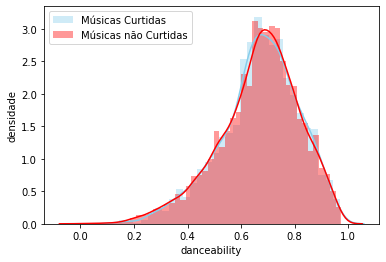

None


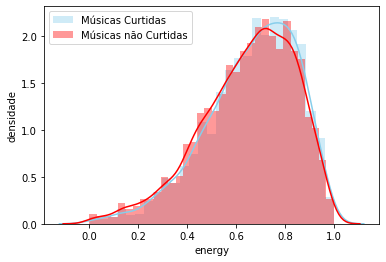

None


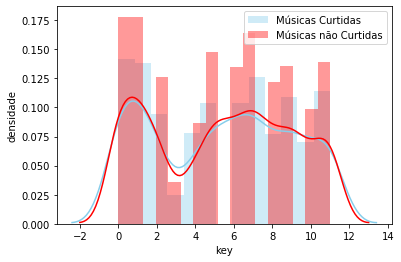

None


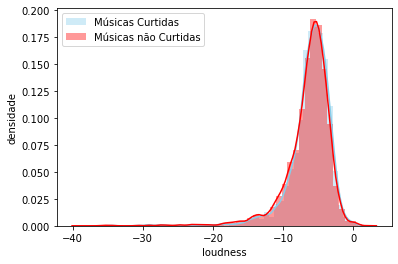

None


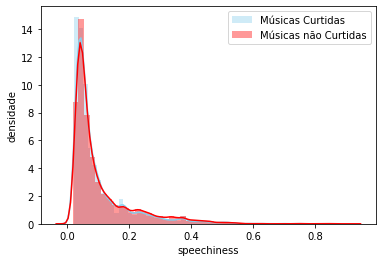

None


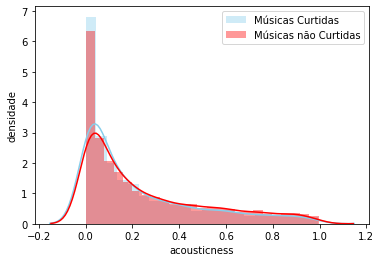

None


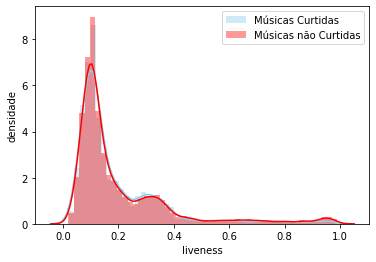

None


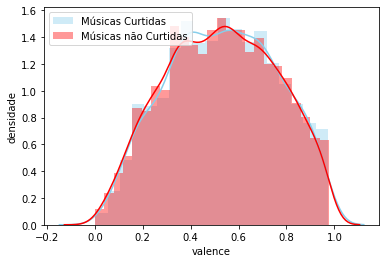

None


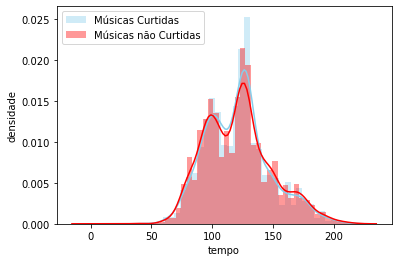

None


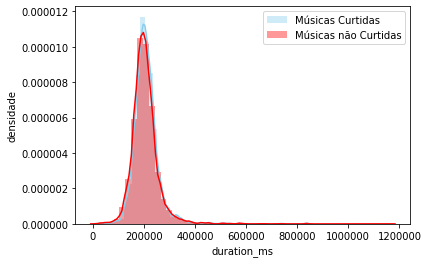

None


In [77]:
# Funçção para cirar histogramas em loop 
def Hist(variavel, curtidas, nao_curtidas):
    sns.distplot( curtidas[variavel] , color="skyblue", label="Músicas Curtidas")
    sns.distplot( nao_curtidas[variavel] , color="red", label="Músicas não Curtidas")
    plt.legend(loc='best')
    
    plt.ylabel('densidade')
    plt.xlabel(variavel)
    return plt.show()
    

features = ['danceability', 'energy', 'key', 'loudness', 
            'speechiness', 'acousticness', #'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms' ]


for i in range(len(features)):
    print(Hist(features[i], musicas_curtidas, musicas_escutadas))
